In [13]:
import pandas as pd
dataset = pd.read_csv('http_logs.csv')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
X = dataset.iloc[:,:]
x = X.values

label = LabelEncoder()

IP = label.fit_transform(x[:,0])
D = label.fit_transform(x[:,1])
U = label.fit_transform(x[:,2])

df1 = pd.DataFrame(IP, columns=['IPs'])
df2 = pd.DataFrame(D, columns=['DATE'])
df3 = pd.DataFrame(U, columns=['URL'])

frames = [df1, df2, df3]
result = pd.concat(frames, axis=1 )

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data_scaled = sc.fit_transform(result)


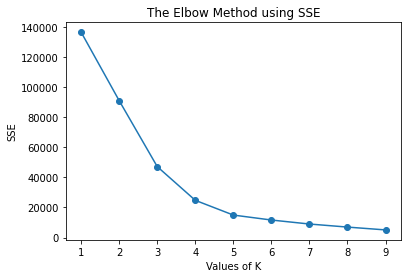

In [14]:
import matplotlib.pyplot as plt
inertias = [] 
K = range(1,10) 

for k in K: 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled) 
    inertias.append(kmeanModel.inertia_) 
                                     

plt.plot(K, inertias, 'o-')
plt.xlabel('Values of K') 
plt.ylabel('SSE') 
plt.title('The Elbow Method using SSE') 
                                     
plt.show() 

In [15]:
from sklearn.cluster import KMeans


# value of k=4 from above graph
model = KMeans(n_clusters=4)
model.fit(data_scaled)
pred  = model.fit_predict(data_scaled)
dataset_scaled = pd.DataFrame(data_scaled, columns=['IP', 'Date', 'URL'])

dataset_scaled['cluster name'] = pred

ips = [dataset['IP'], result['IPs']]
ips_result = pd.concat(ips, axis=1)

def CountFrequency(my_list, ip_label): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    max_freq = 0
    max_key = 0
    for key, value in freq.items(): 
        if value > max_freq:
            max_freq = value
            max_key = key
    
    return ip_label[my_list.index(max_key)]

res = CountFrequency(ips_result['IPs'].tolist(), ips_result['IP'].tolist())

file1 = open("result.txt","w")
file1.write(res)
file1.close()

In [16]:
!notepad result.txt